## **Комментарий ревьюера**

Привет 👋

Меня зовут Валентин, и я буду проверять твой проект. Предлагаю сразу договориться общаться на «ты», если для тебя это не уместно, то дай, пожалуйста, знать, будем общаться на «вы».

### **Краткое резюме по ревью**

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
        
Видны твои старания при работе над данным проектом. Большинство основных этапов в работе сделано хорошо:
- есть много сильных и интересных алгоритмов 🤩
- детально изучены многие тонкости данных
- здорово сделана предобработка данных
- качественно исследованы данные
- сделано много верных промежуточных выводов, основанных на полученных данных

Твоего внимания требует:
- пересмотр вывода

Я описал замечания в комментариях, которые помечены цветом(красным, желтым), после их доработки я смогу принять работу.
    
Спасибо тебе за твой труд! Я на все 100% уверен, что у тебя все получится, и с нетерпением буду ждать твою работу на повторное ревью 😉

</div>

### **PS:**

Хочу поделиться дополнительным материалом, он бесплатный, но объемный(может уйти несколько месяцев):
- У Тимофея Хирьянова есть [Плей-лист по алгоритмам на python](https://www.youtube.com/playlist?list=PLRDzFCPr95fK7tr47883DFUbm4GeOjjc0), это вроде просто видео-лекции, но в описании есть ссылка на лекции и практику, не стесняйся смотреть, преподаватель очень наглядно объясняет материал. На первых уроках задания могут показаться сложными, так как требует знания геометрии, не стесняйся проходить далее, будет проще)

### **Правила оформления:**

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Постарайся учесть эти комментарии для дальнейших проектов. Я использую заголовки в комментариях, они изменят твое оглавление. Но тебе будет удобно перемещаться от комментария к комментарию. А перед перемещением проекта в портфолио просто уберешь данные комментарии.

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта быстрее.

Я буду красить комментарии цветом:

<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h4> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h4>

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.

Также жду от тебя комментарии, где вкратце опишешь изменения, которые были внесены.
</div>

<div class="alert alert-warning"; style="border-left: 7px solid Gold">
<h4> ⚠️ <font color="DarkGoldenRod">Комментарий ревьюера (желтый)</font></h4>

Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
    
В случае изменений кода, опиши, пожалуйста, вкратце то, что изменилось. Если изменений не было, то просто опиши свои мысли на эту тему.
</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h4> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h4>

Такой комментарий говорит о том, что было сделано что-то качественное и правильное 😃
    
Я не буду ждать твоего комментария, но буду ему очень рад 🤗
</div>

Чтобы мы были на одной волне, рекомендую общаться в том же стиле 😊 Твои ответы на мои комментарии будут подкрашиваться в синий цвет.

Ниже я оформил образец для твоего удобства, тебе остается только добавить после моего комментария ячейку с типом **Markdown**, скопировать туда код(чтобы увидеть код дважды, кликни на ячейку) из образца и написать свои мысли по поводу комментария.

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Напиши здесь свои мысли и идеи по поводу комментария ревьюера.

</div>

# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

<div class="alert alert-warning"; style="border-left: 7px solid Gold">
<h5> ⚠️ <font color="DarkGoldenRod">Комментарий ревьюера (желтый)</font></h5>

Для каждой категории необходимо посчитать количество должников, количество людей, которые вернули кредит в срок, и соотношение должников к общему количеству людей в каждой группе.
    
Это касается всех построений ниже.

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Не очень понял. Мы же и так почситали процент невыплаченных кредитов от общего числа заемщиков в каждой категории (по 4-ем категориям в столбце 'ratio_debt_%'). Что требуется сделать ?

</div>

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для решения данной задачи сгруппируем количество задолженностией и количество записей в столбце debt по количеству детей

In [22]:
childdren_debt_data = data.groupby('children')['debt'].agg(['count', 'sum']) #Сгруппируем столбец оригинального датасета debt по количеству детей. , найдем количество и сумму должников в каждой группе.  
#Найдем количество заемщиков в каждой группе и количество не выпллаченных в срок кредитов
childdren_debt_data

,count,sum
children,,
0,14091,1063
1,4808,444
2,2052,194
3,330,27
4,41,4
5,9,0


Найдем долю не выплаченных в срок кредитов от числа общих кредитов в каждой группе

In [23]:
childdren_debt_data['ratio_debt_%'] = data.groupby('children')['debt'].mean()*100#посчитаем проценты и запишем в стоблец ratio
childdren_debt_data = childdren_debt_data.sort_values(by= 'ratio_debt_%', ascending= False) #Отсортируем значения по солбцу 'ratio' по убыванию
childdren_debt_data

,count,sum,ratio_debt_%
children,,,
4,41,4,9.756098
2,2052,194,9.454191
1,4808,444,9.234609
3,330,27,8.181818
0,14091,1063,7.543822
5,9,0,0.000000


Для наглядности построим график среднего числа не выплаченных кредитов от числа детей заемщиков

In [40]:
childdren_debt_data = childdren_debt_data.reset_index(drop = False) #Для простроения графика требуется выделить стоблец children из индекса
childdren_debt_data = childdren_debt_data.loc[0:4:,]
childdren_debt_data 

,index,children,count,sum,ratio_debt_%
0,0,4,41,4,9.756098
1,1,2,2052,194,9.454191
2,2,1,4808,444,9.234609
3,3,3,330,27,8.181818
4,4,0,14091,1063,7.543822


<AxesSubplot:xlabel='children', ylabel='ratio_debt_%'>

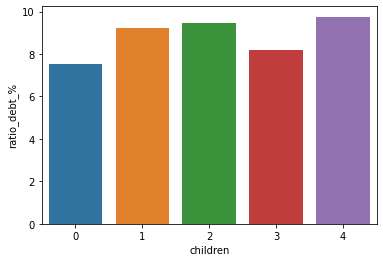

In [41]:
sns.barplot(data= childdren_debt_data, x= 'children', y= 'ratio_debt_%')#Построим график

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Да, у заемщиков с детьми больше вероятность просрочки

</div>

Все **9 заемщиков с 5-ю детьми** возвращали кредиты в срок. Заемщики без детей имееют наименьший процент невыплаченных в срок кредитов. Тем не менее однозначно сказать, что существует зависимость между количеством детей и вероятностью возврата кредита в срок **нельзя**.

**Вывод:** 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для решения данной задачи сгруппируем количество задолженностией и количество записей в столбце debt по семейному статусу заемщиков

In [26]:
family_status_grouped = data.groupby('family_status')['debt'].agg(['count', 'sum']) #Сгруппируем столбец оригинального датасета debt по семейному статуса, найдем количество и сумму должников в каждой группе. 
#Найдем количество заемщиков в каждой группе и количество не выпллаченных в срок кредитов
family_status_grouped

,count,sum
family_status,,
Не женат / не замужем,2796,273
в разводе,1189,84
вдовец / вдова,951,63
гражданский брак,4134,385
женат / замужем,12261,927


Найдем долю не выплаченных в срок кредитов от числа общих кредитов в каждой группе

In [27]:
family_status_grouped['ratio_debt_%'] = data.groupby('family_status')['debt'].mean()*100 #посчитаем отношения и запишем в стоблец ratio
family_status_grouped = family_status_grouped.sort_values(by= 'ratio_debt_%', ascending= False) #Отсортируем значения в стоблце 'ratio' по убыванию
family_status_grouped

,count,sum,ratio_debt_%
family_status,,,
Не женат / не замужем,2796,273,9.763948
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606


In [28]:
family_status_grouped = family_status_grouped.reset_index(drop = False) #Для простроения графика требуется выделить стоблец family_status из индекса
family_status_grouped

,family_status,count,sum,ratio_debt_%
0,Не женат / не замужем,2796,273,9.763948
1,гражданский брак,4134,385,9.313014
2,женат / замужем,12261,927,7.560558
3,в разводе,1189,84,7.064760
4,вдовец / вдова,951,63,6.624606


<AxesSubplot:xlabel='ratio_debt_%', ylabel='family_status'>

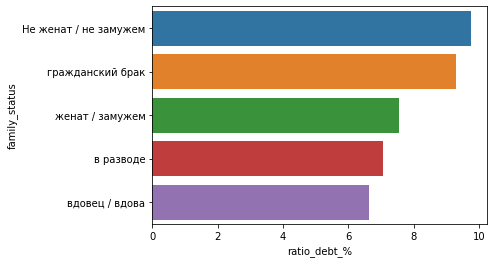

In [29]:
sns.barplot(data= family_status_grouped, x= 'ratio_debt_%', y= 'family_status')#Построим график

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Правильно, заемщики состоящие или состоявшие в браке реже допускают просрочку

</div>

**Вывод:** Заемщики, которые состоят или состояли в браке, выплачивают кредиты в срок чаще 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для решения данной задачи сгруппируем DataFrame по столбу total_income_category

In [30]:
total_income_category_grouped = data.groupby('total_income_category')['debt'].agg(['sum', 'count']) #Группируем по столбцу total_income_category, выводим сумму и количество
total_income_category_grouped

,sum,count
total_income_category,,
A,2,25
B,354,5014
C,1353,15921
D,21,349
E,2,22


In [31]:
total_income_category_grouped['ratio_debt_%'] = data.groupby('total_income_category')['debt'].mean() *100 #посчитаем отношения и запишем в стоблец ratio
total_income_category_grouped = total_income_category_grouped.reset_index(drop = False) 
total_income_category_grouped = total_income_category_grouped.sort_values(by= 'total_income_category', ascending= True) #Отсортируем значения в стоблце total_income_category'
total_income_category_grouped

,total_income_category,sum,count,ratio_debt_%
0,A,2,25,8.000000
1,B,354,5014,7.060231
2,C,1353,15921,8.498210
3,D,21,349,6.017192
4,E,2,22,9.090909


Для наглядности построим график среднего числа не выплаченных кредитов от числа детей заемщиков

In [32]:
#Для простроения графика требуется выделить стоблец family_status из индекса
total_income_category_grouped

,total_income_category,sum,count,ratio_debt_%
0,A,2,25,8.000000
1,B,354,5014,7.060231
2,C,1353,15921,8.498210
3,D,21,349,6.017192
4,E,2,22,9.090909


<AxesSubplot:xlabel='total_income_category', ylabel='ratio_debt_%'>

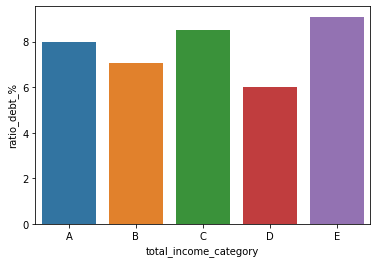

In [33]:
sns.barplot(data= total_income_category_grouped, x= 'total_income_category', y= 'ratio_debt_%')#Построим график

<div class="alert alert-warning"; style="border-left: 7px solid Gold">
<h5> ⚠️ <font color="DarkGoldenRod">Комментарий ревьюера (желтый)</font></h5>

Спасибо за интересные наблюдения, на малочисленные категории заемщиков(А, D, E) ориентироваться не стоит, поэтому можно предположить, что более состоятельный клиент - более надежный

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Ок. Будем учитывать только столбцы B и С

</div>

~**Вывод:** Хотя согласно данным наибольший проент просроченных кредитов у заемщиков с самыми низкими доходами (что возможно невалидно в связи с малым количеством записей в этой категории), ***какой-либо зависимости между уровнем дохода и возвратом кредита в срок нет***~

In [34]:
total_income_category_grouped_bc = total_income_category_grouped.loc[1:2:,] #Выделяем столбцы B и С

<AxesSubplot:xlabel='total_income_category', ylabel='ratio_debt_%'>

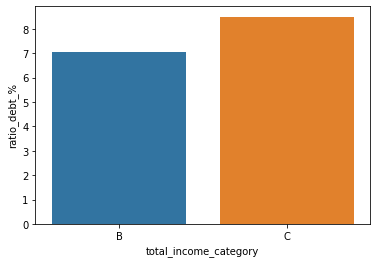

In [35]:
sns.barplot(data= total_income_category_grouped_bc, x= 'total_income_category', y= 'ratio_debt_%')#Построим график

**Вывод:**  
Наблюдается уменьшение процента не выплаченных кредитов у более обеспеченных заемщиков. **Более состоятельный клиент - более надежный.**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Сгруппируем DataFrame по столбцу purpose_category

In [36]:
purpose_category_grouped = data.groupby('purpose_category')['debt'].agg(['count', 'sum']) #Сгруппируем столбец оригинального датасета debt по цели кредита, найдем количество и сумму должников в каждой группе. 
#Найдем количество заемщиков в каждой группе и количество не выпллаченных в срок кредитов
purpose_category_grouped

,count,sum
purpose_category,,
операции с автомобилем,4279,400
операции с недвижимостью,10751,780
получение образования,3988,369
проведение свадьбы,2313,183


In [37]:
purpose_category_grouped['ratio_debt_%'] = data.groupby('purpose_category')['debt'].mean()*100 #посчитаем отношения и запишем в стоблец ratio
purpose_category_grouped = purpose_category_grouped.reset_index(drop = False) 
purpose_category_grouped = purpose_category_grouped.sort_values(by= 'purpose_category', ascending= True) #Отсортируем значения в стоблце purpose_category'
purpose_category_grouped

,purpose_category,count,sum,ratio_debt_%
0,операции с автомобилем,4279,400,9.347978
1,операции с недвижимостью,10751,780,7.255139
2,получение образования,3988,369,9.252758
3,проведение свадьбы,2313,183,7.911803


<AxesSubplot:xlabel='ratio_debt_%', ylabel='purpose_category'>

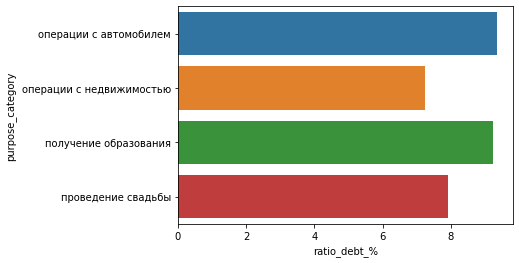

In [38]:
sns.barplot(data= purpose_category_grouped, x= 'ratio_debt_%', y= 'purpose_category')#Построим график

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Хорошее обоснование, ипотечники являются самой обширной категорией и самой добросовестной

</div>

**Вывод:** Кредиты на приобретение автомобилей и получение образования имеют большую (и почти одинаковую) вероятность быть не выплачеными в срок. Кредиты на операции с недвижимостью более безопасные, так как данная категория кредитов имеет самый меньший процент не выплаченных кредитов

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*  

1. Человеческий фактор
2. Некорректная выгрузка/конвертация из другого программного обеспечения

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Да, основные причины — технические ошибки и человеческий фактор

</div>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  

Заполнять медианным значением из группы подобных лучше, так как:

1. Мы сохраняем множество значений для дальнейшего анализа (в отличии от заполнения нулями или другими числами)   
2. Медиана слабо подвержена влиянию невалидных значений в отличии от среднего значения (медиана от [1,2,3,4,5,6] будет 3,5 и от [1,2,3,4,5,10000] будет 3,5, в то время как среднее изменится с 3,5 до ~169) 

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Верно, медиана в отличие от среднего значения, менее чувствительна к выбросам, среднее значение смещается в сторону выбросов.

</div>

Для каждой категории необходимо посчитать количество должников, количество людей, которые вернули кредит в срок, и соотношение должников к общему количеству людей в каждой группе. 

### Шаг 4: общий вывод.

В ходе анализа было установлено следующее:

  1. **Заёмщики без детей чаще выплачивают кредиты в срок**. Однако, зависимости между количеством детей у заемщиков с детьми и вероятностью выплаты кредита не обнаружено                                   
  

  2. **Заемщики, когда-либо бывшие в браке выплачивают кредиты чаще.** Существует зависимость между семейным статусом заемщика и вероятностью выплаты кредита в срок.
  

  3. Зависимости между доходом заемщика и вероятностью выплаты кредита **не обнаружено**

  4. Наиболее "безопасные" кредиты - это кредиты, взятые на **операции с недвижимостью**. Наименее безопасные - на **операции с автомобилем**

<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h5>

В общем выводе хочется тезисно видеть все промежуточные выводы с цифрами. Это очень важно, поскольку топ-менеджеры, в большинстве своем, смотрят сразу сюда и только сюда...

Тут важно обратиться к целям, которые были озвучены в самом начале и ответить на все вопросы. Важно оформить все тезисно и с цифрами. Еще важно описать все промежуточные выводы, которых не прописано в целях.
Вкратце структура такая:
- как были предобработаны данные(тут важно написать про изменения, если заполнялись пропуски или преобразовывались строки)
- пройдись по целям и ответь на вопросы
- добавь промежуточные выводы, которые считаешь нужным отметить

Еще очень важно помнить, для кого ты делаешь проект, в зависимости от этого нужно сделать определенные акценты. В данном случае проект учебный, поэтому нужно ориентироваться по описанию.

Для красивого оформления можешь воспользоваться [Кратким руководством по Маркдауну](https://paulradzkov.com/2014/markdown_cheatsheet/).
    

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Поправил вывод ниже.

</div>

### Шаг 4: общий вывод_rev1.

#### 4.1. Цель работы: 

По заданию от закачика (кредитного отдела банка) в ходе данной работы: 

- Были выполнены анализ и предобработка представленного датасета с данными о заемщиках банка
- Проверены гипотезы влиянии характеристик заеищков на погашение кредита в срок

Результаты исследования будут использованы при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

##### 4.2. Анализ и предобработка представленного датасета с данными о заемщиках банка

В ходе анализа данных датасета с использованием методов .isna() и .unique() **было обнаружено:**

1. Наличие пропусков (количество пропусков 2174) в столбцах days_employed (количество дней стажа заемщика), total_income (ежемесячный доход заемщика)    
2. Наличие вбросов значений в столбце children (значений -1 и 20 в столбце количество детей в семье заемщика) и days_employed (отрицательное количество дней трудового стажа заемщика)  
3. Наличие неявных дубликатов в столбце education (образование заемщика)    
4. Значения в столбце total_income(ежемесячный доход заемщика) записано в переменной типа object. Дробная часть значений данного столбца явно невалидна.

Данные ошибки скорее всего вызваны человеческим фактором при внесении данны вручную и техническими ошибками при выгрузке/конвертации 

В ходе предобработки данного датасета **были выполнены следующие действия:**  
1. Столбец children был очищен от аномальных значений с помощью логической индексации. Столбец days_employed был очищен от отрицательных значений с помощью метода .abs()
2. Пропуска в столбцах days_employed и total_income были заполнены медианным значением дней трудового стажа и ежемесячного дохода соответственно по категории дохода (столбцу income_type) c помощью логической индексации и метода .median()
3. Обработаны неявные дубликаты в столбце education: значения в столбце приведены к одному регистру с помощью метода .str.lower(). Повторяющиеся значения были удалены методом .drop_duplicates()
4. Для удобства дальнейшего анализа тип переменной столбца total_income был изменен на int (Для учета только целой (рублевой) части)

Так же в рамках предобработки данных доходы заемщиков и цели кредитов были категоризированы (с помощью отдельных функций).  
Доход заемщиков был разбит на категории ниже:

- 0–30000 — `E`;
- 30001–50000 — `D`;
- 50001–200000 — `C`;
- 200001–1000000 — `B`;
- 1000001 и выше — `A`.

Цели кредитов были разбиты на категории ниже:

- операции с автомобилем;
- операции с недвижимостью;
- проведение свадьбы;
- получение образования.


Категории были записаны в отдельные столбцы **total_income_category** и **purpose_category**. 
Данные столбцы необходимы для проверки гипотез.

Для заполнения пропусков были использованы медианные значения так как медианные значения мало подвержены вбросам в отличии от средних

##### 4.3. Проверка гипотез

В рамках данной работы были проверены следующие гипотезы (промежуточные выводы указаны под гипотезами): 

**Гипотеза №1:**  
    Есть зависимость между количеством детей и возвратом кредита в срок     

**Вывод по гипотезе №1:**  
Заемшики без детей имеют меньший процент просроченных кредитов (7.543822 %). Возможно это связано с тем, что дети являются источником серьезных трат для заемщиков (по аналогии со вторым кредитом). Зависимости между количеством детей у заемщиков с детьми и процентов выплаченных кредитов нет. Проценты по остальным категориям приведены ниже.  
children - количество детей у заемщиков  
ratio_debt_% - процент просроченных кредитов

<AxesSubplot:xlabel='children', ylabel='ratio_debt_%'>

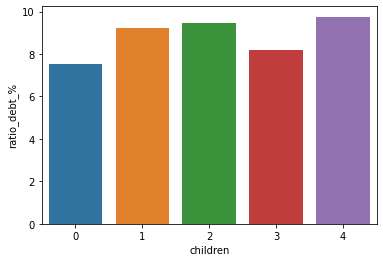

In [48]:
sns.barplot(data= childdren_debt_data, x= 'children', y= 'ratio_debt_%')#Построим график

**Гипотеза №2:**  
    Есть зависимость между семейным положением и возвратом кредита в срок  
         
**Вывод по гипотезе №2:**  
Заемщики, состоящие или состоявшие в браке, возвращают кредиты чаще. Возможно это связано с тем, что данная категория заемщиков серьезнее относится к возвращению кредита в виду возраста или опыта. Процент просрочки по семейному положению дан на диаграмме ниже  
family_status - семейное положение у заемщиков  
ratio_debt_% - процент просроченных кредитов

<AxesSubplot:xlabel='ratio_debt_%', ylabel='family_status'>

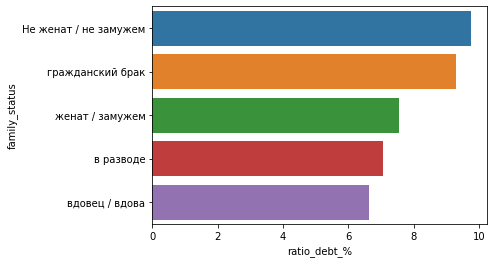

In [50]:
sns.barplot(data= family_status_grouped, x= 'ratio_debt_%', y= 'family_status')#Построим график

**Гипотеза №3:**  
     Есть зависимость между уровнем дохода и возвратом кредита в срок 
         
**Вывод по гипотезе №3:**
    В наиболее массовом сегменте уровня доходов более обеспеченные заемщики возвращают кредиты чаще. Процент просрочки по уровню дохода дан на диаграмме ниже.   
total_income_category - категория дохода (A - заемщики с наибольшим доходом...E - с наименьшим). Столбца A,D,E не информативны из-за малого количества заемщиков  
ratio_debt_% - процент просроченных кредитов

<AxesSubplot:xlabel='total_income_category', ylabel='ratio_debt_%'>

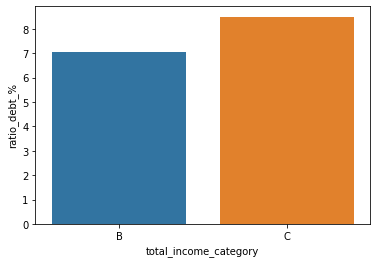

In [51]:
sns.barplot(data= total_income_category_grouped_bc, x= 'total_income_category', y= 'ratio_debt_%')#Построим график

**Гипотеза №4:**  
      Есть зависимость между целью кредита и возвратом его в срок
         
**Вывод по гипотезе №4:**
        Наиболее безопасными для банка являются кредиты, выданные на операции с недвижимостью. Скорее всего это обусловлено тем, что ипотечные займы имеют большие сроки выплаты и небольшой ежемесячный платеж. Наиболее рискованными являются кредиты на образование и покупку автомобилей. Процент просрочки по категориям кредитов на диаграмме ниже.   
total_income_category - категория дохода
ratio_debt_% - процент просроченных кредитов

<AxesSubplot:xlabel='ratio_debt_%', ylabel='purpose_category'>

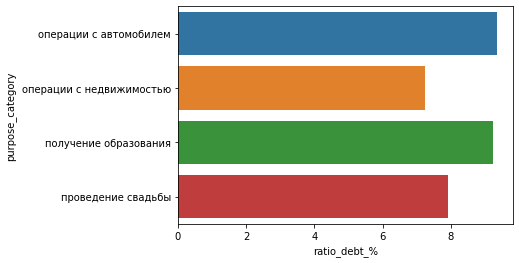

In [52]:
sns.barplot(data= purpose_category_grouped, x= 'ratio_debt_%', y= 'purpose_category')#Построим график

##### 4.4. Общий вывод

Самой **безопасной** категорией заемщиков для банка являются обеспеченные ипотечные заемщики без детей, состоящие или состоявшие в браке. Наличие детей у заемщика, низкий доход, отсутствие в настоящем или прошлом супруга, а так же цель покупки автомобиля в кредит или получение образования являются факторами, повышающими риск не выплаты кредита в срок 
